# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [442]:
import re
import numpy as np
import copy

def linan(str1, str2):
  a1 = re.split(' ',str1) 
  a2 = re.split(' ',str2)
  mtrx = np.array([[float(x) for x in a1], [float(x) for x in a2]])
  #b_mtrx = copy.deepcopy(mtrx)[:2,2:3]
  b_mtrx = copy.deepcopy(mtrx)[:,2]
  a_mtrx = copy.deepcopy(mtrx)[:2,:-1]
  #print(mtrx, a_mtrx, b_mtrx)
  res = np.linalg.solve(a_mtrx, b_mtrx)
  return str(res[0]) + ' ' + str(res[1])

linan('3 2 2', '5 4 3')

'0.9999999999999991 -0.4999999999999989'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [115]:
def decorate_matrix(x):
  mass = np.ones((x,x))
  mass[1:x-1, 1:x-1] = 0

  mass = mass + np.eye(x,x) 
  print(mass)

  mass[np.diag_indices_from(mass)] = 2 # вариант 2
  print(mass)

  indices_diagonal = np.diag_indices(x)
  mass[indices_diagonal] = 3 # вариант 3
  print(mass)

  arr = np.ones((x))
  print(arr)
  np.fill_diagonal(mass,arr) # вариант 4

  arr = [4 for i in range(x)]
  np.fill_diagonal(mass,arr) # вариант 4
  print(mass)
  
  for i in range(x): # вариант 5 простой цикл
    mass[i][i] +=1

  # вариант 6
  mass = [[mass[i][j] if i!=j else 6 for i in range(x)] for j in range(x)]
  return mass

decorate_matrix(4)  

[[2. 1. 1. 1.]
 [1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 2.]]
[[2. 1. 1. 1.]
 [1. 2. 0. 1.]
 [1. 0. 2. 1.]
 [1. 1. 1. 2.]]
[[3. 1. 1. 1.]
 [1. 3. 0. 1.]
 [1. 0. 3. 1.]
 [1. 1. 1. 3.]]
[1. 1. 1. 1.]
[[4. 1. 1. 1.]
 [1. 4. 0. 1.]
 [1. 0. 4. 1.]
 [1. 1. 1. 4.]]


[[6, 1.0, 1.0, 1.0],
 [1.0, 6, 0.0, 1.0],
 [1.0, 0.0, 6, 1.0],
 [1.0, 1.0, 1.0, 6]]

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# будем считать, что рассматриваемая функциядифференцирема на всей области определения (из тетрадки 3 оптимизация)

def plot_function(F):
    x = range(-100, 100)
    y = list(map(F, x))

    plt.plot(x, y)
    plt.ylabel("Y")
    plt.xlabel("X")

def F(x, a, b):
  return (x + a)**2 - b

def af(y,a,b):
  return (y+b)**(1/2) - a

def df(x, a, b):
  return 2*x + a

def G(x, a, b):
  return np.abs(F(x,a,b))

def dg(x, a, b):
  if (x + a)**2 - b != 0:
    #return (2*x + a) / math.fabs((x + a)**2 - b)
    return (x + a)**2 - b / math.fabs((x + a)**2 - b)
  return NaN

def sse_(X, y, w0, w1):
    return ((w0+w1*X - y)**2).sum()

def gradient_descent_to_min(local_func, inp_a, inp_b):
  x0 = 2
  x1 = 2
  step = 0.001 # шаг для градиентного спуска
  dx = 0.00001
  
  X = np.linspace(-5, 5, 100)
  x = np.random.choice(X)
  for i in range(10000):
    curr = (local_func(x + dx, inp_a, inp_b) - local_func(x, inp_a, inp_b)) / dx
    x -= step * curr
  return x

a = 3
b = 4
f_xmin = gradient_descent_to_min(F, a, b)
f_ymin = F(f_xmin, a, b)
g_xmin = gradient_descent_to_min(G, a, b)
g_ymin = G(g_xmin, a, b)
print(round(f_xmin), round(g_xmin))
#print(f_ymin, g_ymin)

-3.0 -1.0


In [26]:
print(G(-6,3,4))

5


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

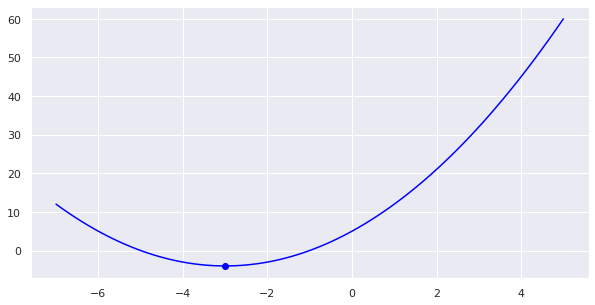

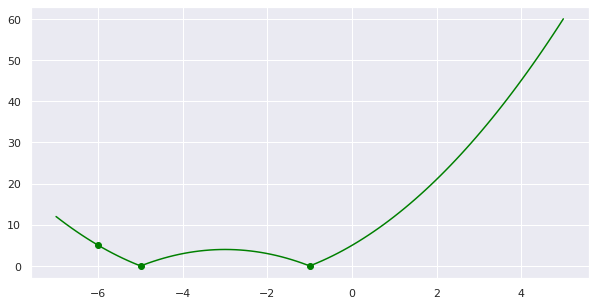

In [29]:
def print_plot(f, plots, l_color):
  
  X = np.linspace(-7, 5, 100)
  Y = np.array([f(x,a,b) for x in X])
  
  sns.set() # настройка над matplotlib
  fig = plt.figure(figsize=(10,5)) # размер поля графика
  axes = fig.subplots()
  axes.plot(X, Y, color=l_color)

  for i in range(len(plots)):
    axes.scatter(plots[i][0], plots[i][1], color=l_color)
  plt.show()
  
print_plot(F, [(f_xmin, f_ymin)], 'blue')
print_plot(G, [(g_xmin, g_ymin), (-5,0), (-6,5)], 'green')


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой сторой (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)?

In [35]:
import math
humans = 1000
attempts = 10 
sigma = [0,1]

# события независимые

'''
иными словами первая задача:
возможность каждого на выпадение случаев всех одинаковых сторон
так как хотя бы значит, что выпадения 10к может повторяться
тогда вероятность каждого вычисляется размещением с повторением - степень 1000
вероятность выпадения 10 монет одинаковыми - 2/ 1024 - 
т.е. либо все орлы, либо все решки - 2 варианта
и 2**10 = 1024 - общее количество вариантов
'''
total_penny_outcome = len(sigma)**attempts
ans1 = 1 - ((1 - (2/ total_penny_outcome))**humans)
# print((1 - 2/1024)**1000) # ни у кого не получилось
# print(1-((1 - 2/1024)**1000)) - искомое значение
print(ans1, ' - вероятность выпадения 10 у 1 человека одной и той же стороны монетки')


'''
вторая задача решается аналогичным образом:
учитывая выбор РОВНО 8 подряд одинаковых сторон (*2 и не учитывая 9 или 10 выпадений) 
монетки выходит 6 вариантов (3*2),
вероятность события выпадения соответственно делим на 1024 вариантов всего. 
Вычитаем полученную вероятность из 1 - не получилось вычислить.
Степень humans добавляет размещения с повторением на всех 1000 человек - получаем,
что никто не вытащил 8 подряд. Искомый ответ находится вычитанием из единицы.
'''
#ans2 = 1 - ((1 - 6/total_penny_outcome)**humans)
# с учетом 9 и 10:
ans2 = 1 - ((1 - 12/total_penny_outcome)**humans)
print(ans2, ' - вероятность выпадения 8 подряд у 1 человека одной и той же стороны монетки')

#ans3_1 = (math.factorial(humans) / (math.factorial(humans-3)*  math.factorial(3)))
ans3_1 = 1000*999*998 / (3*2)
ans3_2 = ((1/2)**10)**3 
ans3_3 = 1 - ((1/2)**10)**3
# print(ans3_1, ans3_2, ans3_3)
ans3 = ans3_1 * ans3_2 * ans3_3
print(ans3, ' - вероятноcть выпадения 10 у 3 человек одной и той же стороны монетки')

0.858440454732242  - вероятность выпадения 10 у 1 человека одной и той же стороны монетки
0.9999924045088164  - вероятность выпадения 8 подряд у 1 человека одной и той же стороны монетки
0.1547550781120033  - вероятноcть выпадения 10 у 3 человек одной и той же стороны монетки
